<a href="https://colab.research.google.com/github/Kh0uloud/Camera-Calibration-CV/blob/main/Periodic_Motion_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kh0uloud/Camera-Calibration-CV.git

Cloning into 'Camera-Calibration-CV'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), 1.98 MiB | 6.56 MiB/s, done.


In [2]:
!mkdir /content/data

In [3]:
import pickle

with open("/content/Camera-Calibration-CV/segmentation_dict(1).pickle", "rb") as file:
    data = pickle.load(file)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#/content/drive/MyDrive/Periodic_Motion_CV/seg

In [6]:
len(data.keys())

315

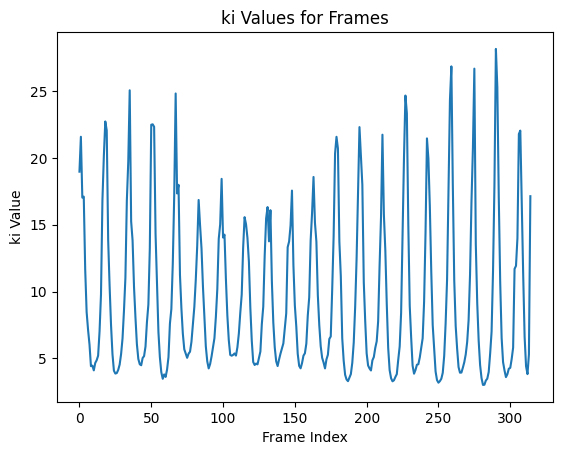

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ki_values = []  # Store the ki values for each frame
evectors=[] #eigenvectors

# Iterate over each frame
for pixels in data.values():
    # Compute the covariance matrix
    covariance_matrix = np.cov(pixels[0].T)  # Transpose the data to have each data point as a row

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Compute ki
    ki = eigenvalues[1] / eigenvalues[0]

    # Append ki value to the list
    ki_values.append(ki)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    # Access the first eigenvector (e) and its corresponding eigenvalue (v1)
    evectors.append(eigenvectors[:, 0]) 

# Plot the ki values for the frames
frame_indices = range(len(data.keys()))  # Assuming the frames are indexed from 0 to (num_frames - 1)
plt.plot(frame_indices, ki_values)
plt.xlabel("Frame Index")
plt.ylabel("ki Value")
plt.title("ki Values for Frames")
plt.show()

In [8]:
!pip install peakutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


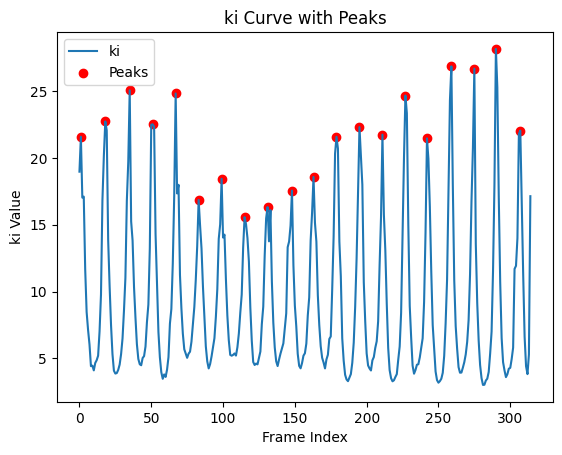

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import peakutils

# Find the indices of the peaks in the ki curve
peak_indices = peakutils.indexes(np.array(ki_values), thres=0.3, min_dist=5)

# Plot the ki curve with peaks
plt.plot(ki_values, label='ki')
plt.scatter(peak_indices, [ki_values[i] for i in peak_indices], color='r', label='Peaks')
plt.xlabel('Frame Index')
plt.ylabel('ki Value')
plt.title('ki Curve with Peaks')
plt.legend()
plt.show()

# Extract the lambda-shaped frames from the peak indices
lambda_frames = []
for i in peak_indices:
    lambda_frames.append(i)

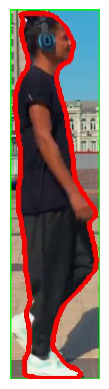

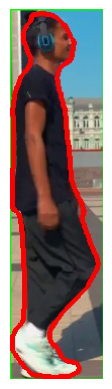

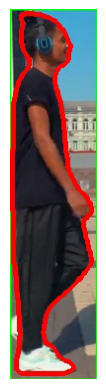

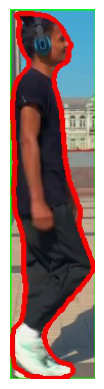

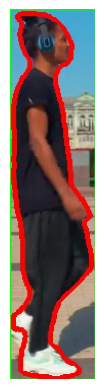

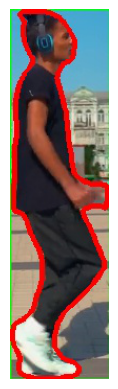

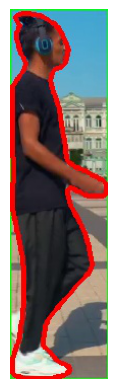

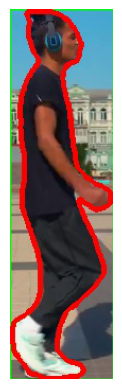

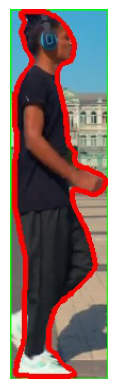

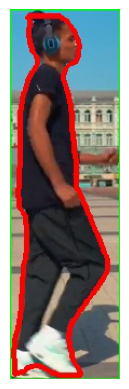

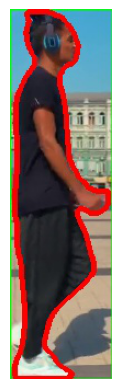

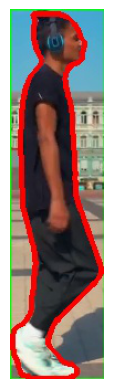

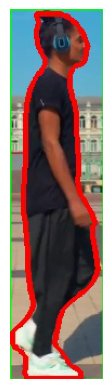

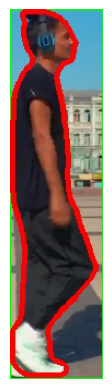

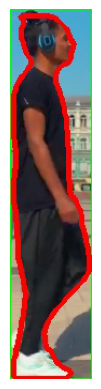

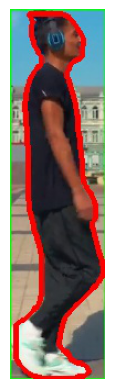

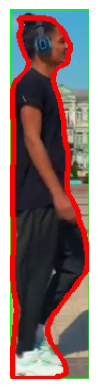

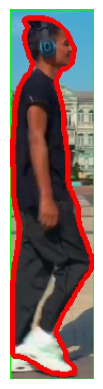

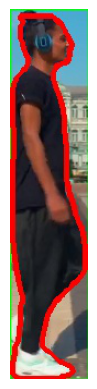

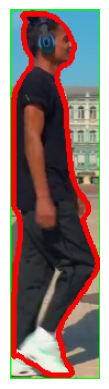

In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in lambda_frames: 
    image = mpimg.imread(('/content/drive/MyDrive/Periodic_Motion_CV/seg/pedestrian_blob_' + str(i) + '_processed.jpg'))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

<h2>Detect image points of toes on ground plane </h2> 

<h3>Detect toe positions on pedestrian blobs</h3> 

In [11]:
for j in data['/content/drive/MyDrive/blobs/pedestrian_blob_'+str(i)+'.jpg']:
  print(j)
  break

[[14  4]
 [13  4]
 [12  4]
 ...
 [33  4]
 [29  4]
 [29  4]]


In [12]:
import cv2

def detect_toe_positions(i):
    toe_positions = []

    image = cv2.imread('/content/drive/MyDrive/Periodic_Motion_CV/seg/pedestrian_blob_' + str(i) + '_processed.jpg')
    h, w, _ = image.shape
    c=(h/2,w/2)
    #'/content/drive/MyDrive/blobs/pedestrian_blob_'+str(i)+'.jpg'
    # Iterate through each pixel in the blob
    min_dot_product = np.inf
    optimal_toe_position = None
        
    for pixel in data['/content/drive/MyDrive/blobs/pedestrian_blob_'+str(i)+'.jpg'][0]:
        # Calculate the vector from c to the pixel
        t = pixel - c
        e = evectors[i]
        # Calculate the dot product of e and t
        dot_product = np.dot(e, t)
        # Check if the dot product is minimal
        if dot_product < min_dot_product:
            min_dot_product = dot_product
            optimal_toe_position = pixel
        elif dot_product == min_dot_product:
            # Choose the pixel farthest from the principal axis
            if np.linalg.norm(pixel - c) > np.linalg.norm(optimal_toe_position - c):
                optimal_toe_position = pixel
        
    # Append the optimal toe position to the list
    toe_positions.append(optimal_toe_position)

    """
    # Plot the image
    plt.imshow(image)

    #plt.scatter(toe_positions[1], toe_positions[0], color='red', marker='o')   #!! Need the bounding box coordinates 
    plt.scatter(c[1], c[0], color='yellow', marker='o')

    # Show the plot
    plt.show() """

    return toe_positions


# Example usage:
# Assuming you have pedestrian blobs detected and stored in a list called 'pedestrian_blobs'
"""
# Call the function to detect toe positions
toe_positions = detect_toe_positions(image, bounding_box)

# Print the detected toe positions
for i, position in enumerate(toe_positions):
    print(f"Toe position for pedestrian {i+1}: {position}")
"""

'\n# Call the function to detect toe positions\ntoe_positions = detect_toe_positions(image, bounding_box)\n\n# Print the detected toe positions\nfor i, position in enumerate(toe_positions):\n    print(f"Toe position for pedestrian {i+1}: {position}")\n'

In [ ]:
toe_positions = []
for i in lambda_frames:
    toe_positions.append(detect_toe_positions(i))

<h2>Recover the three orthogonal vanishing points</h2> 
<h3>Recover the vanishing point corresponding to the walking direction</h3>

In [ ]:
left_toe_points

array([[ 67, 372],
       [ 55, 371],
       [ 49, 364],
       [ 42, 364],
       [ 56, 347],
       [ 53, 337],
       [ 15, 341],
       [  5, 345],
       [ 42, 348],
       [ 45, 339]], dtype=int32)

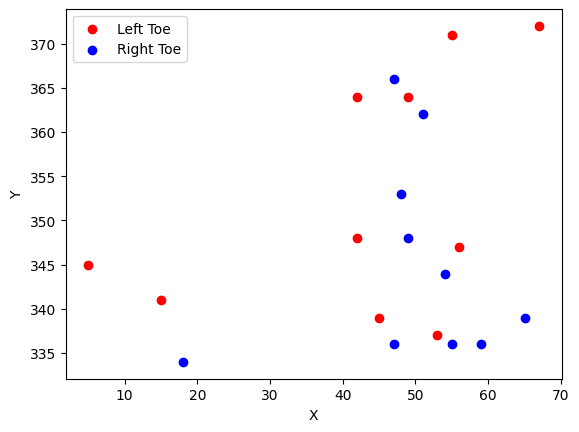

In [ ]:
import matplotlib.pyplot as plt

left_toe_points = []
right_toe_points = []
for i, point in enumerate(toe_positions):
    if i%2==0 :
        left_toe_points.append(point[0])
    else :
        right_toe_points.append(point[0])

left_toe_points = np.vstack(left_toe_points)
right_toe_points = np.vstack(right_toe_points)

# Scatter plot the points with different colors for left toe and right toe
left_x, left_y = zip(*left_toe_points)
right_x, right_y = zip(*right_toe_points)

plt.scatter(left_x, left_y, color='red', label='Left Toe')
plt.scatter(right_x, right_y, color='blue', label='Right Toe')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

"\n# Plot the lines\nx = np.array([0, 1])  # X range for plotting the lines\nplt.plot(x, -left_w * x - left_b, color='red', label='Left Toe Line')\nplt.plot(x, -right_w * x - right_b, color='blue', label='Right Toe Line')\n\n# Show the plot\nplt.show()\n"

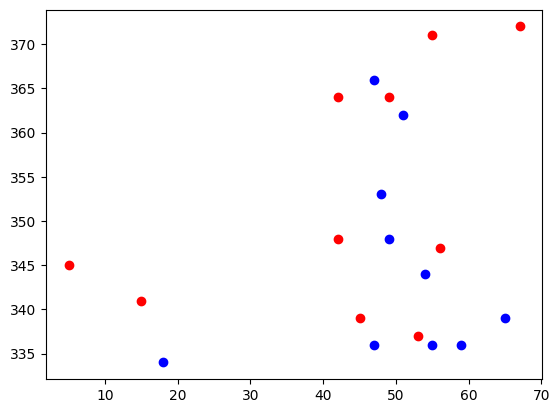

In [ ]:
import numpy as np
from numpy.linalg import lstsq

# Fit lines to left toe positions
left_w, left_b = lstsq(np.vstack([left_toe_points[:, 0], np.ones(len(left_toe_points))]).T, -left_toe_points[:, 1], rcond=None)[0]

# Fit lines to right toe positions
right_w, right_b = lstsq(np.vstack([right_toe_points[:, 0], np.ones(len(right_toe_points))]).T, -right_toe_points[:, 1], rcond=None)[0]

# Compute the covariance matrix of left toe positions
left_covariance = np.cov(left_toe_points.T)

# Compute the covariance matrix of right toe positions
right_covariance = np.cov(right_toe_points.T)

plt.scatter(left_x, left_y, color='red', label='Left Toe')
plt.scatter(right_x, right_y, color='blue', label='Right Toe')
"""
# Plot the lines
x = np.array([0, 1])  # X range for plotting the lines
plt.plot(x, -left_w * x - left_b, color='red', label='Left Toe Line')
plt.plot(x, -right_w * x - right_b, color='blue', label='Right Toe Line')

# Show the plot
plt.show()
"""

# Compute the vanishing point by finding the intersection of the lines
#vx = np.linalg.solve(np.vstack([left_w, -right_w]), np.array([-left_b, right_b]))

# Print the vanishing point
#print("Vanishing point (vx):", vx)


In [ ]:
#For this part, we're going to randomise the left/right toes 


In [ ]:
import cv2

# Path to the input video file
video_path = '/content/drive/MyDrive/Periodic_Motion_CV/walking.mp4'

# Path to the output frames directory
output_directory = '/content/drive/MyDrive/Periodic_Motion_CV/frames'

# Open the video file
video = cv2.VideoCapture(video_path)

# Initialize variables
frame_count = 0
success = True

# Iterate through the video frames
while success:
    # Read the next frame
    success, frame = video.read()
    
    if success:
        # Construct the output frame file name
        frame_filename = f'frame_{frame_count}.jpg'
        
        # Save the frame as an image file
        frame_path = os.path.join(output_directory, frame_filename)
        cv2.imwrite(frame_path, frame)
        
        # Increment the frame count
        frame_count += 1

# Release the video file
video.release()

print(f'Frames extracted: {frame_count}')

Frames extracted: 356
